In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'cost_of_living_us.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset
data.head()


,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


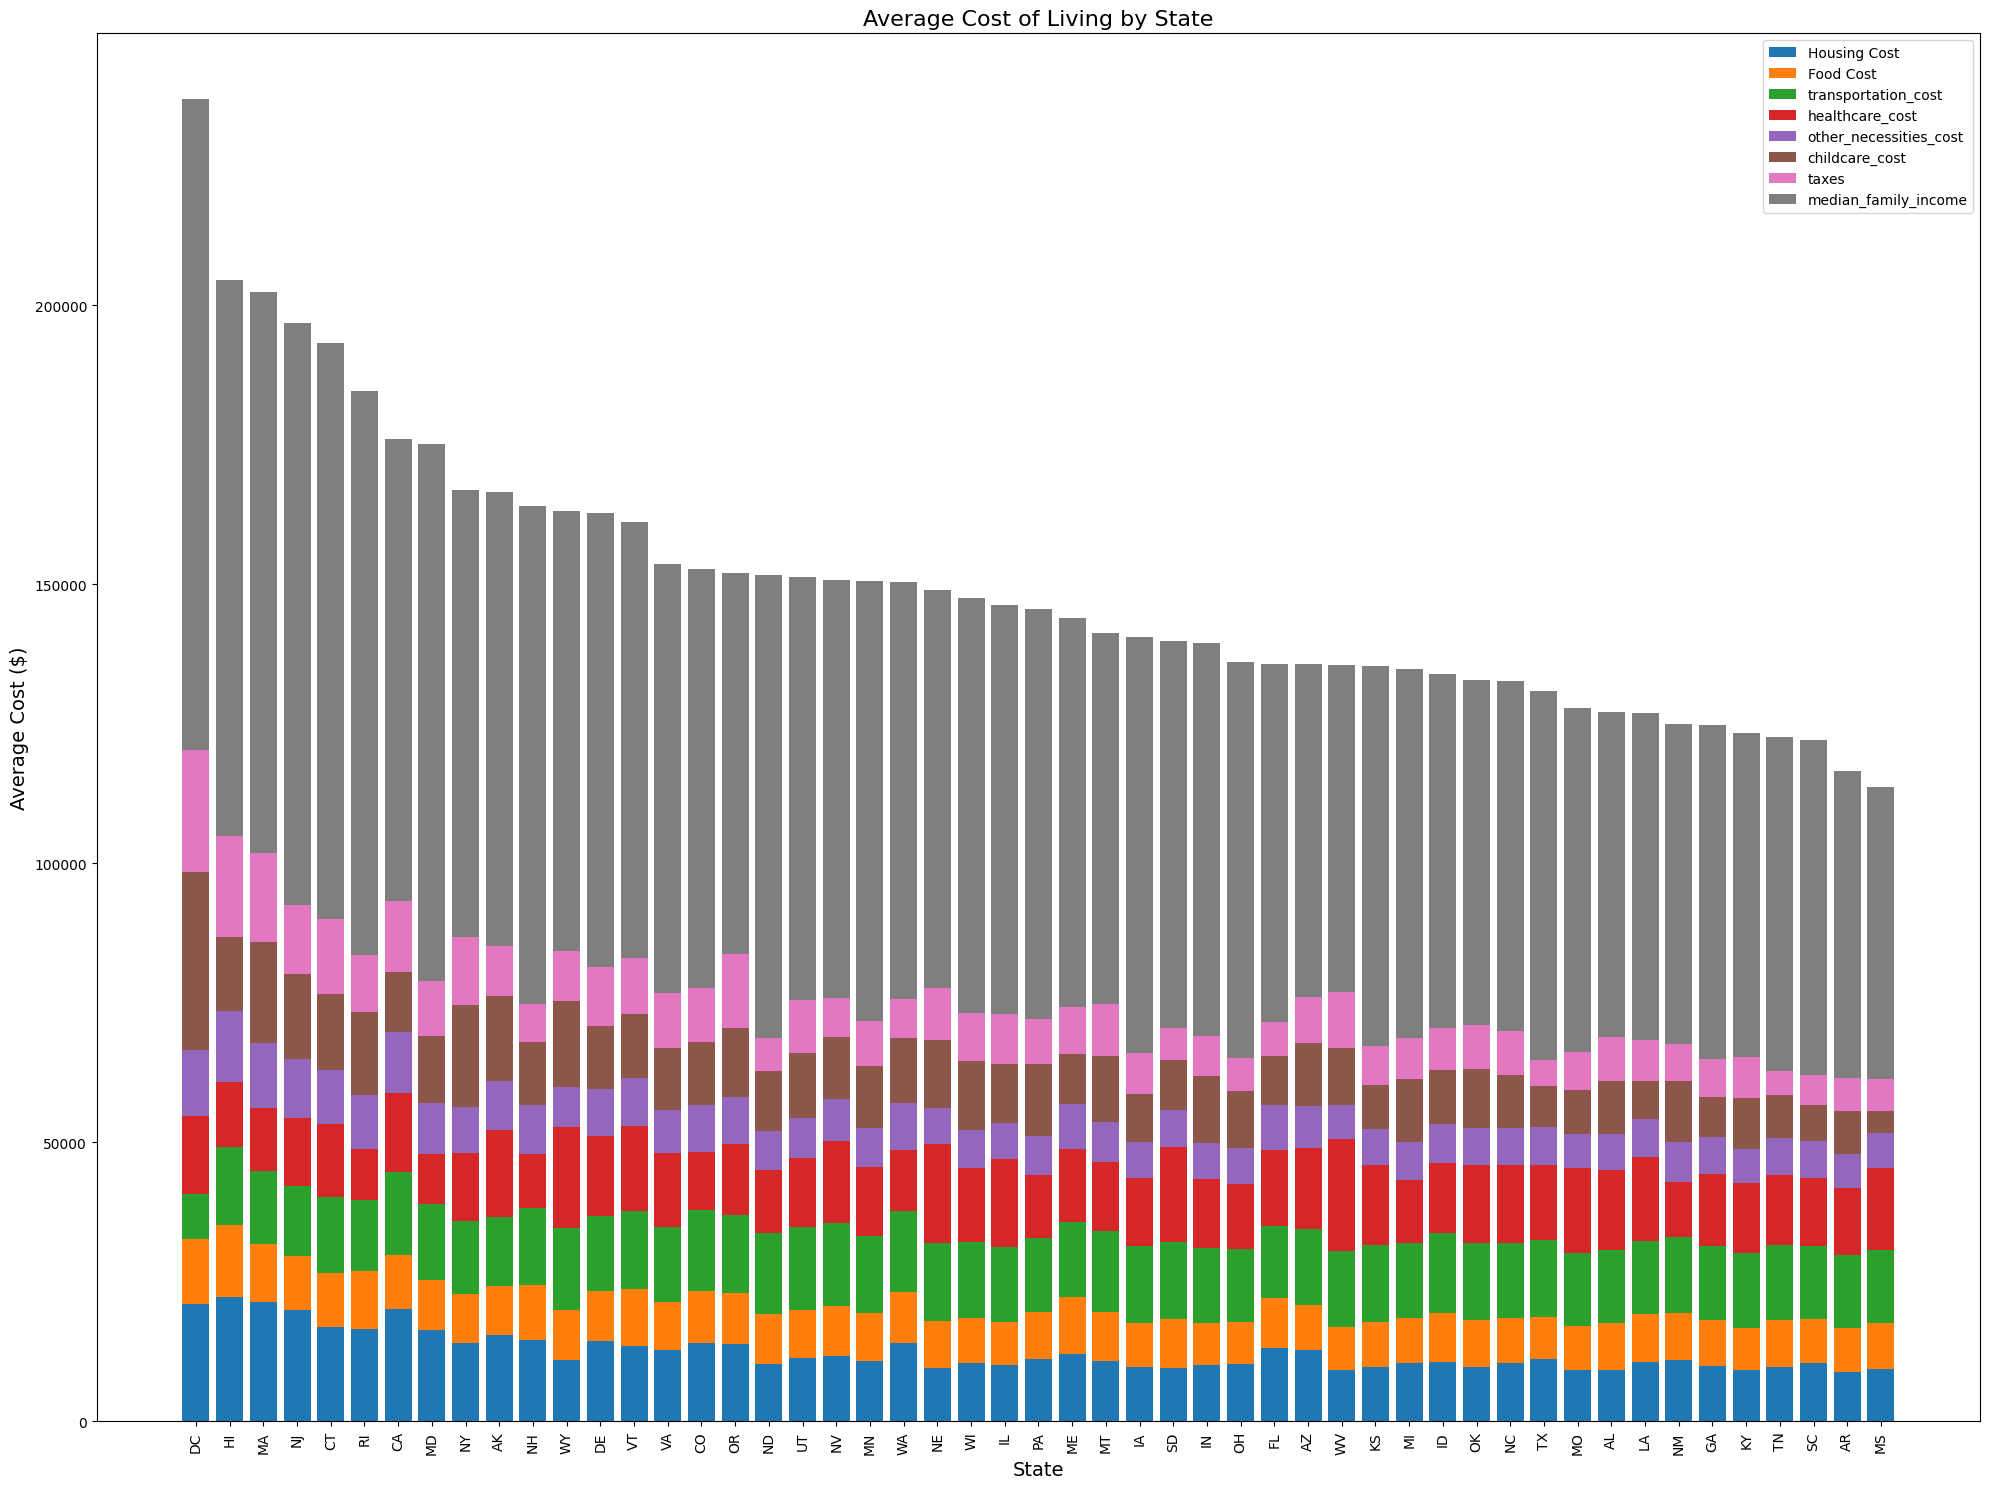

In [3]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop(['case_id', 'total_cost'])
average_state_data_numeric = data.groupby('state')[numeric_columns].mean().reset_index()

average_state_data_numeric['total_cost'] = average_state_data_numeric[numeric_columns].sum(axis=1)
average_state_data_numeric_sorted = average_state_data_numeric.sort_values(by='total_cost', ascending=False)

plt.figure(figsize=(20, 15))

bar = plt.bar(average_state_data_numeric_sorted['state'], average_state_data_numeric_sorted['housing_cost'], label='Housing Cost')
bar = plt.bar(average_state_data_numeric_sorted['state'], average_state_data_numeric_sorted['food_cost'], bottom=average_state_data_numeric_sorted['housing_cost'], label='Food Cost')
bottom = average_state_data_numeric_sorted['housing_cost'] + average_state_data_numeric_sorted['food_cost']
for column in numeric_columns.drop(['housing_cost', 'food_cost']):
    bar = plt.bar(average_state_data_numeric_sorted['state'], average_state_data_numeric_sorted[column], bottom=bottom, label=column)
    bottom += average_state_data_numeric_sorted[column]


plt.xlabel('State', fontsize=14)
plt.ylabel('Average Cost ($)', fontsize=14)
plt.title('Average Cost of Living by State', fontsize=16)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()


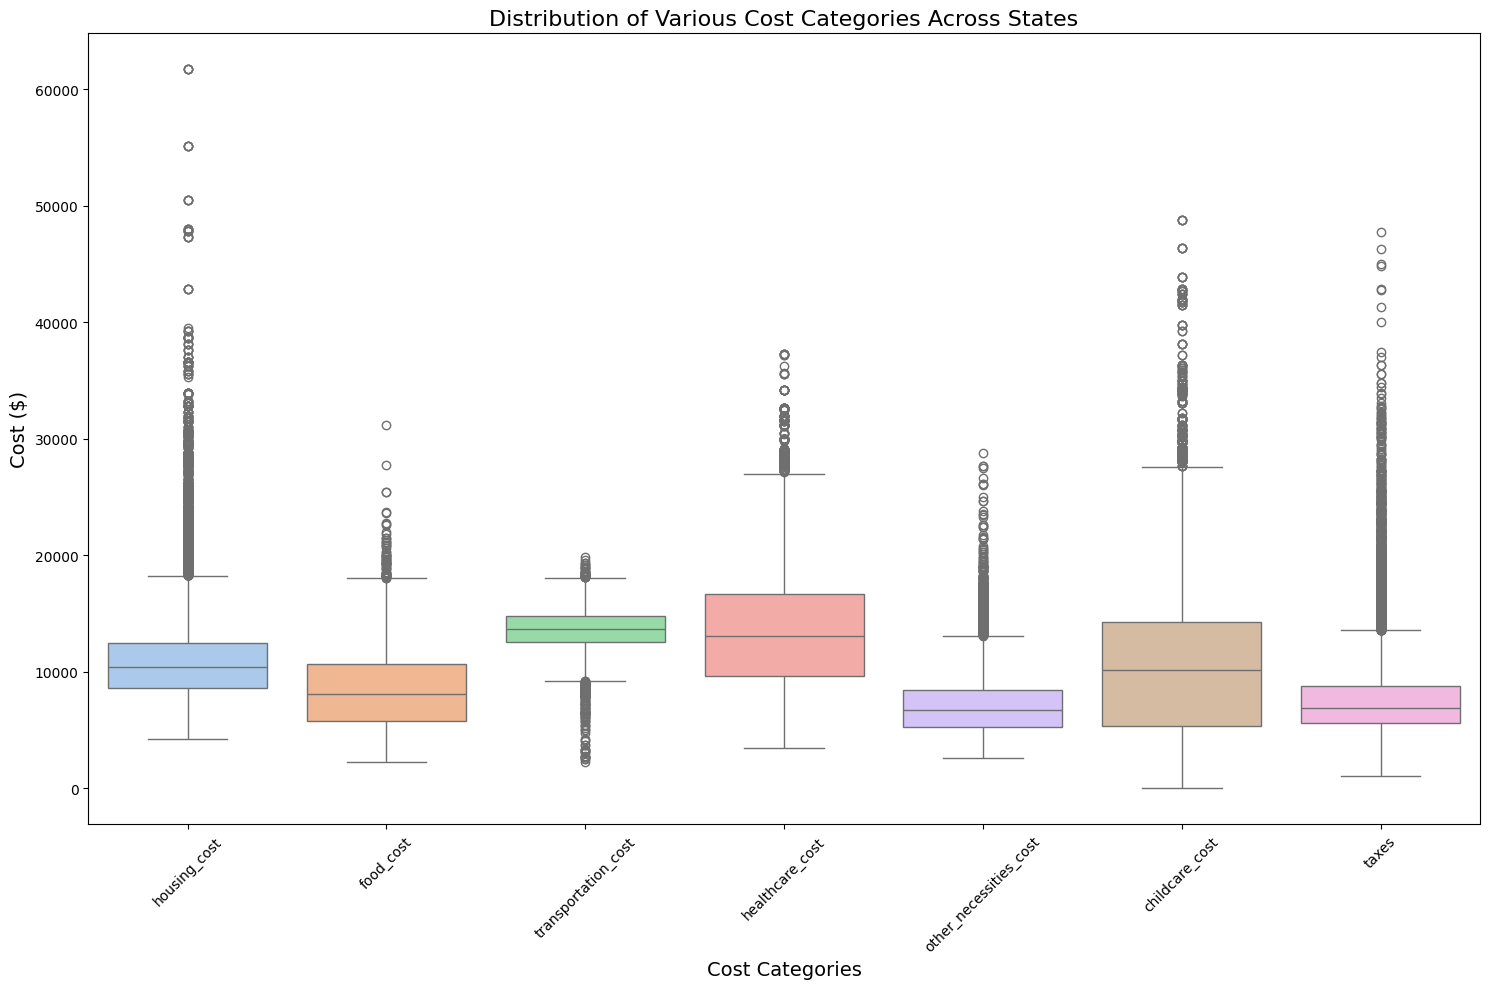

In [11]:
data = pd.read_csv(file_path)

data = data.iloc[1:]

cost_categories = ['housing_cost', 'food_cost', 'transportation_cost', 'healthcare_cost', 'other_necessities_cost', 'childcare_cost', 'taxes']

plt.figure(figsize=(15, 10))

sns.boxplot(data=data[cost_categories], palette='pastel')
plt.xlabel('Cost Categories', fontsize=14)
plt.ylabel('Cost ($)', fontsize=14)
plt.title('Distribution of Various Cost Categories Across States', fontsize=16)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
